In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

df= pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")


print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import seaborn as sns

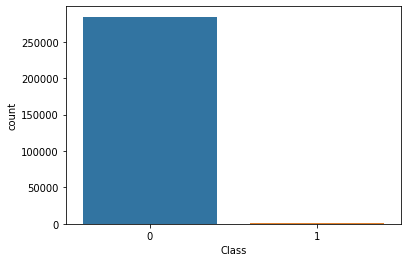

In [ ]:
sns.countplot(x='Class', data=df,)

In [ ]:
fraud_cards= df[df['Class']==1]

fraud_cards['Amount'].describe().round(2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

In [ ]:
sc = StandardScaler()
amount = df['Amount'].values
#Amount values stored in array i.e a row

df['normAmount']= sc.fit_transform(amount.reshape(-1,1))
# reshape into a cloumn with n number of rows

df= df.drop(['Time'], axis=1)

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X= df.drop('Class',axis=1)
y= df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state= 42)

In [ ]:
print("number X_train", X_train.shape)
print("number X_test", X_test.shape)
print("number y_train", y_train.shape)
print("number y_test", y_test.shape)

number X_train (199364, 30)
number X_test (85443, 30)
number y_train (199364,)
number y_test (85443,)


In [ ]:
#Logistic reg

lr= LogisticRegression()

lr.fit(X_train,y_train.ravel())# if no error no problem, .ravel() will adjust into proper cloumn to remove error

predictions= lr.predict(X_test)

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.64      0.74       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm= SMOTE(random_state= 42)

In [ ]:
X_train_res,y_train_res= sm.fit_resample(X_train,y_train.ravel())

print("Shape after resampling X_train : {}".format(X_train_res.shape))
print("Shape after resampling y_train : {} \n".format(y_train_res.shape))

print("After oversampling, count of label '1' : {}".format(sum(y_train_res == 1)))
print(sum(y_train == 1))
print("After oversampling, count of label '0' : {}".format(sum(y_train_res == 0)))
print(sum(y_train == 0))

Shape after resampling X_train : (398016, 30)
Shape after resampling y_train : (398016,) 

After oversampling, count of label '1' : 199008
356
After oversampling, count of label '0' : 199008
199008


In [ ]:
lr= LogisticRegression()

lr.fit(X_train_res,y_train_res.ravel())# if no error no problem, .ravel() will adjust into proper cloumn to remove error

predictions= lr.predict(X_test)

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.07      0.92      0.13       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
from imblearn.under_sampling import NearMiss
nr= NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train,y_train.ravel())

In [ ]:
lr= LogisticRegression()

lr.fit(X_train_miss,y_train_miss.ravel())# if no error no problem, .ravel() will adjust into proper cloumn to remove error

predictions= lr.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26     85307
           1       0.00      0.97      0.00       136

    accuracy                           0.15     85443
   macro avg       0.50      0.56      0.13     85443
weighted avg       1.00      0.15      0.26     85443



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

xgb.fit(X_train_res,y_train_res)

pred= xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.14      0.92      0.24       136

    accuracy                           0.99     85443
   macro avg       0.57      0.96      0.62     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
xgb = XGBClassifier()

xgb.fit(X_train_miss,y_train_miss)

pred= xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15     85307
           1       0.00      1.00      0.00       136

    accuracy                           0.08     85443
   macro avg       0.50      0.54      0.07     85443
weighted avg       1.00      0.08      0.14     85443



In [ ]:
# 1. Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)